# Density Module - RDF
The `freud.density` module is intended to compute a variety of quantities that relate spatial distributions of particles with other particles.
This example demonstrates the calculation of the [radial distribution function](https://en.wikipedia.org/wiki/Radial_distribution_function) which measures the spatial density of particles in a system.

In [1]:
import numpy as np
import freud
import util
from helper_functions.box_plotting import box_2d_to_points
import matplotlib.pyplot as plt
%matplotlib inline

To start, we construct and visualize a set of points sitting on a simple square lattice.

In [2]:
def plot_lattice(box, points, with_color=False):
    fig, ax = plt.subplots(1, 1, figsize=(9, 6))
    ax.scatter(points[:, 0], points[:, 1])
    box_points = box_2d_to_points(box)
    ax.plot(box_points[:, 0], box_points[:, 1])
    return fig, ax

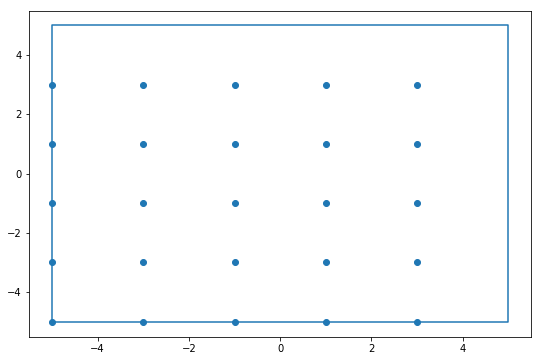

In [3]:
box, points = util.make_square(5, 5)
fig, ax = plot_lattice(box, points)

If we try to compute the RDF directly from this, we will get something rather uninteresting since we have a perfect crystal.
Indeed, we will observe that as we bin more and more finely, we approach the true behavior of the RDF for perfect crystals, which is a simple delta function.

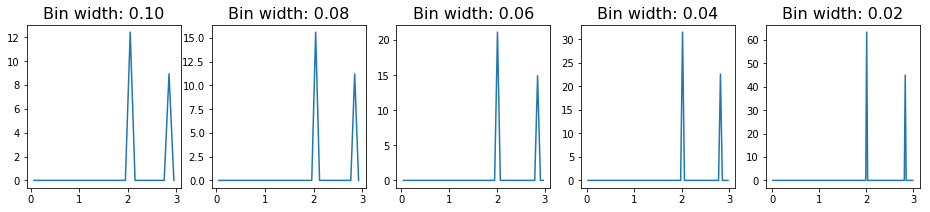

In [4]:
drs = np.linspace(0.1, 0.02, 5)
rmax = 2.5
fig, axes = plt.subplots(1, len(drs), figsize=(16, 3))
for i, dr in enumerate(drs):
    rdf = freud.density.RDF(3, dr)
    rdf.compute(box, points)
    axes[i].plot(rdf.R, rdf.RDF)
    axes[i].set_title("Bin width: {:2.2f}".format(dr), fontsize=16)

In these RDFs, we see two sharply defined peaks, with the first corresponding to the nearest neighbors on the lattice (which are all at a distance 2 from each other), and the second, smaller peak caused by the particles on the diagonal (which sit at distance $\sqrt{2^2+2^2} \approx 2.83$.

However, in more realistic systems, we expect that the lattice will not be perfectly formed.
In this case, the RDF will exhibit more features.
To demonstrate this fact, we reconstruct the square lattice of points from above, but we now introduce some noise into the system.

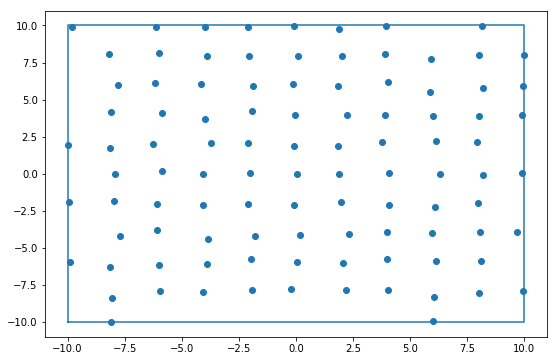

In [5]:
box, points = util.make_square(10, 10, noise=0.15)
fig, ax = plot_lattice(box, box.wrap(points))

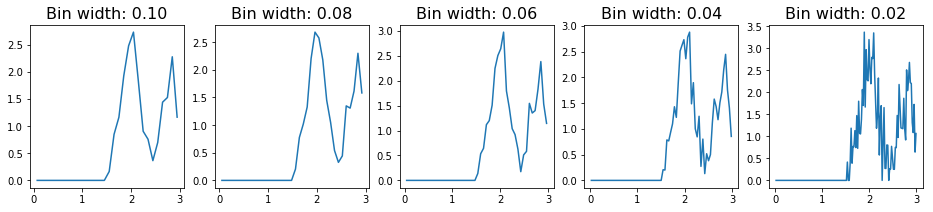

In [6]:
drs = np.linspace(0.1, 0.02, 5)
rmax = 2.5
fig, axes = plt.subplots(1, len(drs), figsize=(16, 3))
for i, dr in enumerate(drs):
    rdf = freud.density.RDF(3, dr)
    rdf.compute(box, points)
    axes[i].plot(rdf.R, rdf.RDF)
    axes[i].set_title("Bin width: {:2.2f}".format(dr), fontsize=16)

In this RDF, we can see that increasing the number of bins leads to noisier results because we are essentially overfitting the data.

It may also be useful to get the cumulative RDF.
The relationship between the cumulative RDF and the RDF is akin to that between a cumulative density and a probability density function, providing a measure of the total density of particles experienced up to some distance rather than the value at that distance.
Just as a CDF can help avoid certain mistakes common to plotting a PDF, plotting the cumulative RDF may be helpful in some cases.

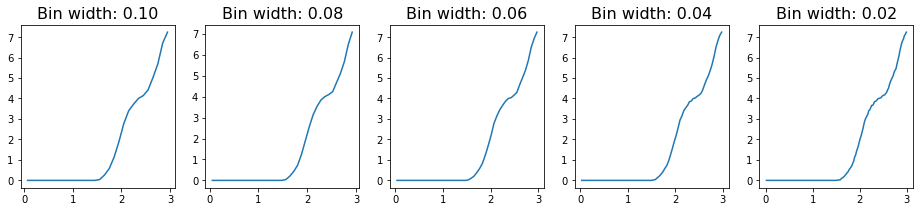

In [7]:
drs = np.linspace(0.1, 0.02, 5)
rmax = 2.5
fig, axes = plt.subplots(1, len(drs), figsize=(16, 3))
for i, dr in enumerate(drs):
    rdf = freud.density.RDF(3, dr)
    rdf.compute(box, points)
    axes[i].plot(rdf.R, rdf.n_r)
    axes[i].set_title("Bin width: {:2.2f}".format(dr), fontsize=16)